# Visão Humana e Cores

Prof. Dr. Gustavo Resque  
MSc. Tiago Araújo

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import *
import cv2

### Luz

In [2]:
def plot_luz():
    fig_luz, ax = plt.subplots(1,1,figsize=(7,3), dpi = 100)

    def update_luz(f=5, s=100, p=1):
        ax.clear()
        x = np.arange(s)
        y = np.sin(p + 2 * np.pi * f * x/s)
        ax.plot(x,y)

    def plotluz(frequency,samples, phase):
        update_luz(f=frequency,s=samples, p=phase)

    interact(plotluz, frequency=(0,10,1), samples=(10,110,10),phase=(0,10,1));

<IPython.core.display.Javascript object>


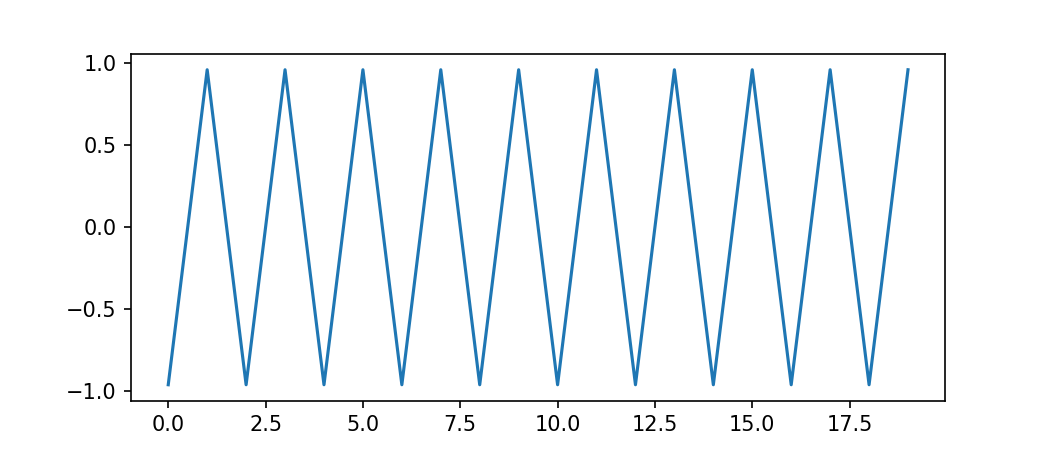

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J2ZyZXF1ZW5jeScsIG1heD0xMCksIEludFNsaWRlcih2YWx1ZT02MCwgZGVzY3JpcHRpb249dSfigKY=


In [3]:
plot_luz()

### Cores

In [4]:
from matplotlib.colors import *

hsv_canvas = np.zeros((200,200,3), dtype=np.float32)
rgb_canvas = np.zeros((200,200,3), dtype=np.uint8)

slider_hue = FloatSlider(min=0,max=1,step=.1,value=.5,description='Hue')
slider_sat = FloatSlider(min=0,max=1,step=.1,value=.5,description='Saturation')
slider_val = FloatSlider(min=0,max=1,step=.1,value=.5,description='Value')

slider_red = IntSlider(min=0,max=255,step=10,value=125,description='Red')
slider_green = IntSlider(min=0,max=255,step=10,value=125,description='Green')
slider_blue = IntSlider(min=0,max=255,step=10,value=125,description='Blue')

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='flex-end',
                    width='100%',
                    overflow_x='unset')

group_hsv = [slider_hue,slider_sat,slider_val]
group_rgb = [slider_red, slider_green, slider_blue]

box_hsv = Box(children=group_hsv, layout=box_layout)
box_rgb = Box(children=group_rgb, layout=box_layout)

def update_colors_hsv(h,s,v):
    hsv_canvas[:,:,:] = h,s,v
    
def update_colors_rgb(r,g,b):
    rgb_canvas[:,:,:] = r,g,b

vb_hsv=VBox([box_hsv])
vb_rgb=VBox([box_rgb])

update_colors_hsv(.5,.5,.5)
update_colors_rgb(120,120,120)

In [5]:
def colors_plots_interact():
    fig, axes = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=2)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    axes[0].imshow(hsv_to_rgb(hsv_canvas))
    axes[1].imshow(rgb_canvas)
    plt.tight_layout()
    def plotcolors_hsv(args):
        update_colors_hsv(h=slider_hue.value,s=slider_sat.value, v=slider_val.value)
        axes[0].imshow(hsv_to_rgb(hsv_canvas))

    def plotcolors_rgb(args):
        update_colors_rgb(r=slider_red.value,g=slider_green.value,b=slider_blue.value)
        axes[1].imshow(rgb_canvas)

    for s in group_hsv:
        s.observe(plotcolors_hsv, names='value')

    for s in group_rgb:
        s.observe(plotcolors_rgb, names='value')

    display(HBox([vb_hsv, vb_rgb]))


<IPython.core.display.Javascript object>


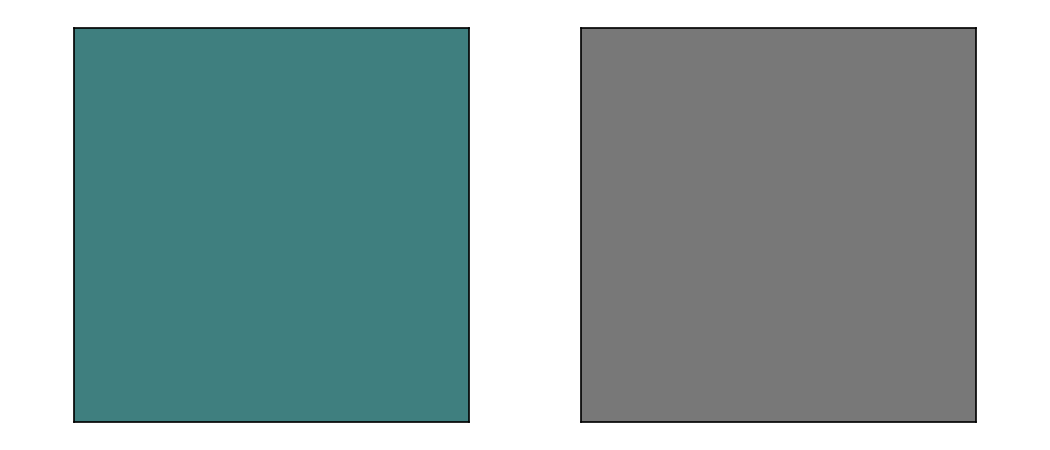

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oQm94KGNoaWxkcmVuPShGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXUnSHVlJywgbWF4PTEuMCksIEZsb2F0U2xpZGVyKHbigKY=


In [6]:
colors_plots_interact()

<IPython.core.display.Javascript object>


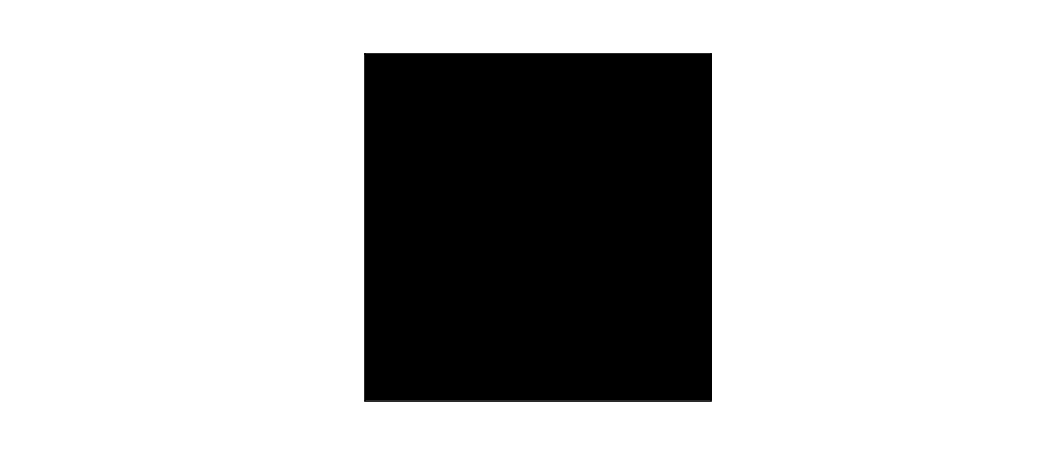

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oQm94KGNoaWxkcmVuPShGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXUnSHVlJywgbWF4PTEuMCksIEZsb2F0U2xpZGVyKHbigKY=


In [7]:
slider_hue_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Hue')
slider_sat_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Saturation')
slider_val_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Value')

slider_red_link = IntSlider(min=0,max=255,step=10,value=125,description='Red')
slider_green_link = IntSlider(min=0,max=255,step=10,value=125,description='Green')
slider_blue_link = IntSlider(min=0,max=255,step=10,value=125,description='Blue')

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='flex-end',
                    width='100%',
                    overflow_x='unset')

group_hsv_link = [slider_hue_link,slider_sat_link,slider_val_link]
group_rgb_link = [slider_red_link, slider_green_link, slider_blue_link]

box_hsv_link = Box(children=group_hsv_link, layout=box_layout)
box_rgb_link = Box(children=group_rgb_link, layout=box_layout)

vb_hsv_link=VBox([box_hsv_link])
vb_rgb_link=VBox([box_rgb_link])

def colors_link_interact():
    fig, ax = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=1)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
     
    linked_canvas = np.zeros((200,200,3), dtype=np.uint8)
    linked_canvas_hsv = np.zeros((200,200,3), dtype=np.float32)
    ax.imshow(linked_canvas_hsv)
    
    def plotcolors_hsv(args):    
        linked_canvas_hsv[:,:,:] = slider_hue_link.value,slider_sat_link.value, slider_val_link.value
        ax.imshow(hsv_to_rgb(linked_canvas_hsv))
        r,g,b = hsv_to_rgb(linked_canvas_hsv)[100,100] * 255
        slider_red_link.value = r.astype(np.uint8)
        slider_green_link.value = g.astype(np.uint8)
        slider_blue_link.value = b.astype(np.uint8)

    for s in group_hsv_link:
        s.observe(plotcolors_hsv, names='value')

    display(HBox([vb_hsv_link, vb_rgb_link]))
    
colors_link_interact()

### Imagem Digital

In [8]:
random_imagem_pb = np.random.randint(0,size=(15,15),high=2)
print random_imagem_pb

[[1 1 1 1 0 1 0 0 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 0 1 1 0 1 1 0 0 1]
 [0 1 0 0 1 0 1 1 0 0 0 0 0 1 0]
 [1 0 1 1 0 0 1 0 1 1 1 1 0 0 1]
 [0 1 0 0 1 1 0 0 1 0 0 1 1 1 1]
 [0 1 1 0 0 0 0 0 0 1 1 1 0 0 0]
 [1 1 0 1 0 1 1 0 0 1 0 1 0 0 1]
 [1 1 0 1 1 0 1 0 1 1 0 0 0 1 1]
 [1 0 0 1 0 1 0 0 1 0 0 1 1 0 1]
 [1 0 0 0 1 0 0 1 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 1 1 1 0 1 1]
 [0 1 1 0 1 1 1 0 1 1 0 1 0 1 1]
 [1 1 0 0 1 0 0 1 0 0 1 1 0 0 1]
 [1 0 1 0 1 0 0 1 1 1 0 0 0 1 1]
 [1 1 0 0 0 1 0 1 0 0 1 0 0 1 0]]


In [9]:
random_imagem_cinza = np.random.randint(0,size=(15,15),high=256)
print random_imagem_cinza.view(type=np.matrix)

[[  9 122  70  10  49 233  98  11 234 153 216  22 230 220  41]
 [ 72 113 249 185 200  32 248  64  79 177 205 115  52 225  63]
 [215 195 184 106 195  32 226 194  84   6 224  64 218 112  71]
 [ 24 227 119   6 222 137 133 205  79 158 121  94  38 131  29]
 [177 230 255  28 130 227 138 217 235 228 139  72 171  12   0]
 [ 32 140  41  88 120 213  74 142 144 181 160 121 221 245 180]
 [ 47 138  21  22   8 108 106  40 159 211 235 235  20  25 187]
 [ 68  34  76 210 116 131 199 221 168 187 208   5 211 165 114]
 [148 169  15 200 133 238 192 127 168 219  84  12 206 190  19]
 [151 244   0 106  95 116 203   5 214 212 206 123 153  32 221]
 [ 27 253 201 118 131 229  84 138  33 184   9  27 217 140  39]
 [150 193 124 222  51  29  53 141  67  72  21  45 153 219 245]
 [ 50  64 247  52 175  91 166 180 230  28 158  12 226 111  12]
 [252  17 198 247 125 116 192 171  85 109 140  82 145  74 107]
 [131 202 164 184  34  96  41 222  96  71  90  10  26  28 150]]


In [10]:
random_imagem_color = np.random.randint(0,size=(3,3,3),high=256)
print random_imagem_color

[[[144 110  41]
  [186 169 188]
  [222   7 233]]

 [[ 61 122  99]
  [102  38 199]
  [ 35  48 114]]

 [[182 223 125]
  [ 51  56 109]
  [213 116 141]]]


In [11]:
def mostrar_imagens(path):
    fig, axes = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=3)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    
    colorida = cv2.imread(path,1) # 1 colorida
    cinza = cv2.imread(path,0) # 0 escala de cinza
    newimg = cv2.cvtColor(colorida, cv2.COLOR_BGR2HSV)
    newimg[:,:,0] = newimg[:,:,0] + 10
    
    thresh, pb = cv2.threshold(cinza, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    axes[0].imshow(cv2.cvtColor(colorida, cv2.COLOR_BGR2RGB))
    axes[1].imshow(cinza,cmap='gray')
    axes[2].imshow(pb,cmap='gray')

<IPython.core.display.Javascript object>


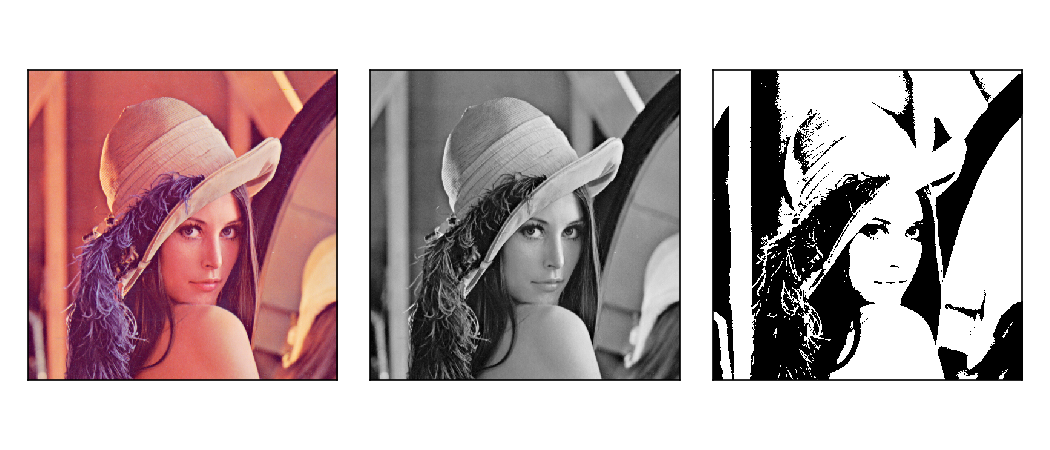

In [12]:
mostrar_imagens('dataset/lenna.png')

In [13]:
# não ficou completo
def mostrar_profundidade(path):
    fig, axes = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=3)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()    
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axes[0].imshow(img)
    img.dtype = np.int8
    axes[1].imshow(img)

<IPython.core.display.Javascript object>


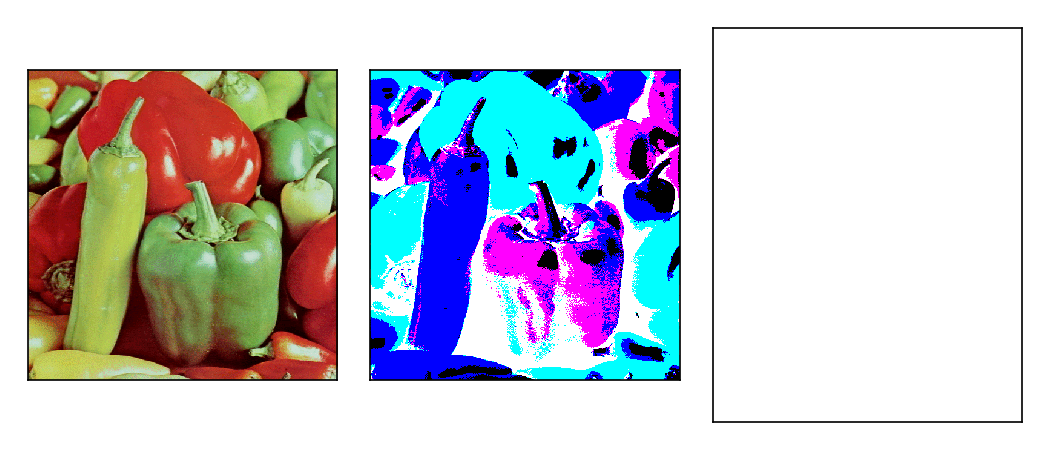

In [14]:
mostrar_profundidade('dataset/peppers.tif')

In [15]:
def mostrar_res(caminho):
    fig, axes = plt.subplots(figsize=(5,2), dpi = 200, nrows=1, ncols=4)
    img = cv2.cvtColor(cv2.imread(caminho,1),cv2.COLOR_BGR2RGB)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    
    axes[0].imshow(img)
    axes[1].imshow(cv2.resize(img,(100,100)))
    axes[2].imshow(cv2.resize(img,(25,25)))
    axes[3].imshow(cv2.resize(img,(5,5)))
    #plt.tight_layout()

<IPython.core.display.Javascript object>


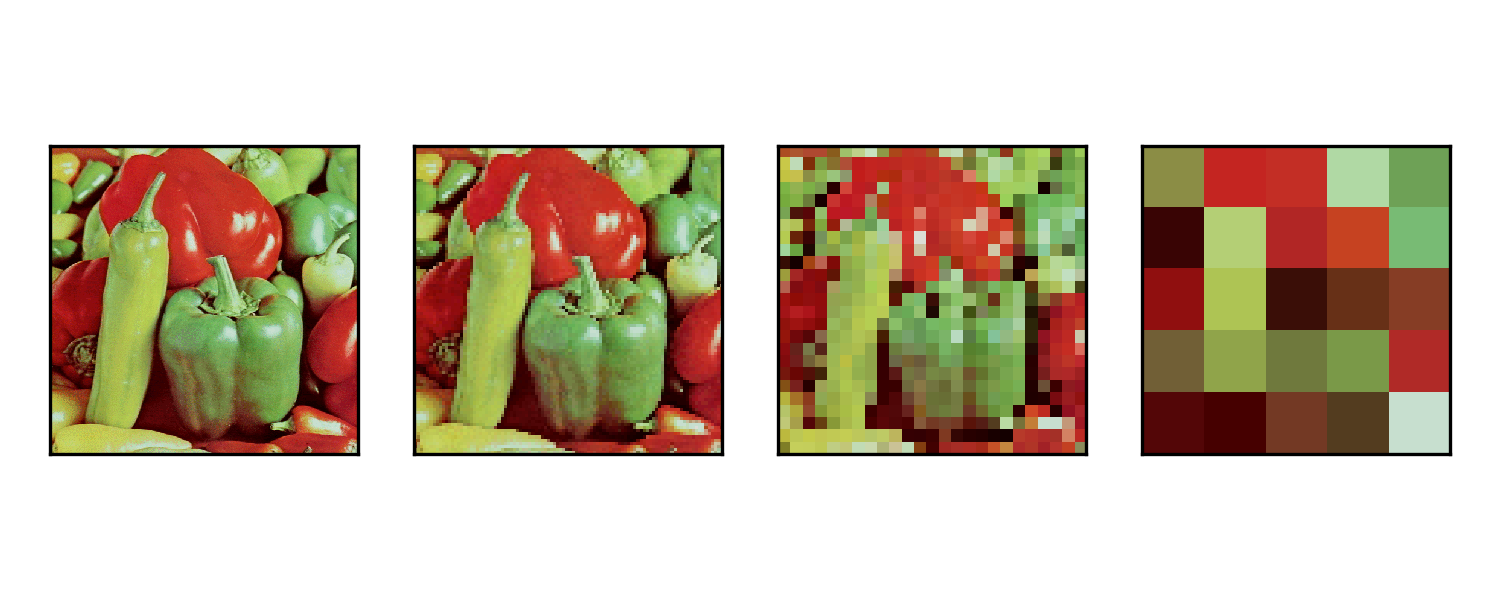

In [16]:
mostrar_res('dataset/peppers.tif')

### Amostragem

In [17]:
def desenha_grid(img, grid_n):
    rows_n = np.linspace(0, img.shape[0], grid_n)
    cols_n = np.linspace(0, img.shape[1], grid_n)
    
    for i in rows_n:
        cv2.line(img, (int(i), 0), (int(i), img.shape[1]), (0,0,0), 3)
    for j in cols_n:
        cv2.line(img, (0, int(j)), (img.shape[0], int(j)), (0,0,0), 3)

def mostrar_amostragem(caminho):
    
    fig, axes = plt.subplots(figsize=(5,2), dpi = 200, nrows=1, ncols=3)
    img = cv2.cvtColor(cv2.imread(caminho,1),cv2.COLOR_BGR2RGB)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    
    def update(args):
        v = args['new']
        axes[0].imshow(img)
        grid = np.copy(img)
        desenha_grid(grid, v)
        axes[1].imshow(grid)
        axes[2].imshow(cv2.resize(img,(v,v)))
    
    update({'new':20})
    slider = IntSlider(min=5,max=50,step=5,value=10,description='Tamanho')
    #slider_quantization = IntSlider(min=3,max=255,step=20,value=255,description='Profundidade')
    slider.observe(update, names='value')
    display(slider)

<IPython.core.display.Javascript object>


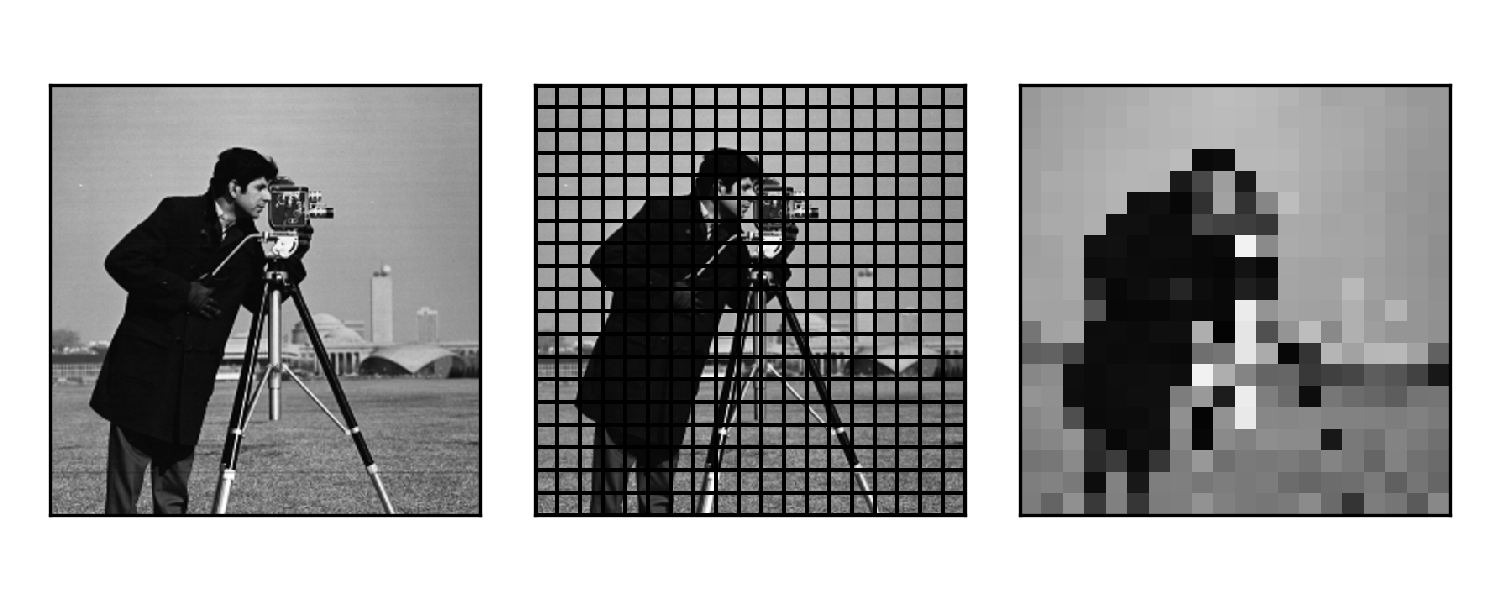

IntSlider(value=10, description=u'Tamanho', max=50, min=5, step=5)

In [18]:
mostrar_amostragem('dataset/cameraman.tif')